# 🧹 Bike Rental Analytics - Phase 2: Data Cleaning & Validation

## Project Overview
This notebook focuses on cleaning and validating the Citi Bike and weather data identified in Phase 1, preparing it for database implementation.

## Phase 2 Objectives
- Handle missing data strategically
- Filter extreme outliers in trip durations
- Standardize data formats and types
- Validate data quality and business rules
- Prepare clean datasets for database loading

---


## 📦 Import Libraries & Load Data


In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import glob


# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Define data paths (adjust if your folder structure is different)
data_dir = Path("../data")
citibike_files = sorted(glob.glob("../data/JC-2016*-citibike-tripdata.csv"))
all_months_data = [pd.read_csv(f) for f in citibike_files]
bike_df = pd.concat(all_months_data, ignore_index=True)
weather_data_path = data_dir / "newark_airport_2016.csv"



# Load the weather data
weather_df = pd.read_csv(weather_data_path)

# Preview the data to confirm successful loading
print("Citi Bike Data Sample:")
print(bike_df.head())
print("\nWeather Data Sample:")
print(weather_df.head())


Citi Bike Data Sample:
   Trip Duration           Start Time            Stop Time  Start Station ID  \
0            362  2016-01-01 00:02:52  2016-01-01 00:08:54              3186   
1            200  2016-01-01 00:18:22  2016-01-01 00:21:42              3186   
2            202  2016-01-01 00:18:25  2016-01-01 00:21:47              3186   
3            248  2016-01-01 00:23:13  2016-01-01 00:27:21              3209   
4            903  2016-01-01 01:03:20  2016-01-01 01:18:24              3195   

  Start Station Name  Start Station Latitude  Start Station Longitude  \
0      Grove St PATH               40.719586               -74.043117   
1      Grove St PATH               40.719586               -74.043117   
2      Grove St PATH               40.719586               -74.043117   
3       Brunswick St               40.724176               -74.050656   
4            Sip Ave               40.730743               -74.063784   

   End Station ID End Station Name  End Station Latitude 

## 🚨 Handle Trip Duration Outliers

From Phase 1, we discovered extreme trip durations (some > 100 days!). Let's analyze and filter these outliers.


count    247584.000000
mean         14.760509
std         598.966275
min           1.016667
25%           4.133333
50%           6.500000
75%          11.100000
max      272163.466667
Name: Trip Duration (min), dtype: float64


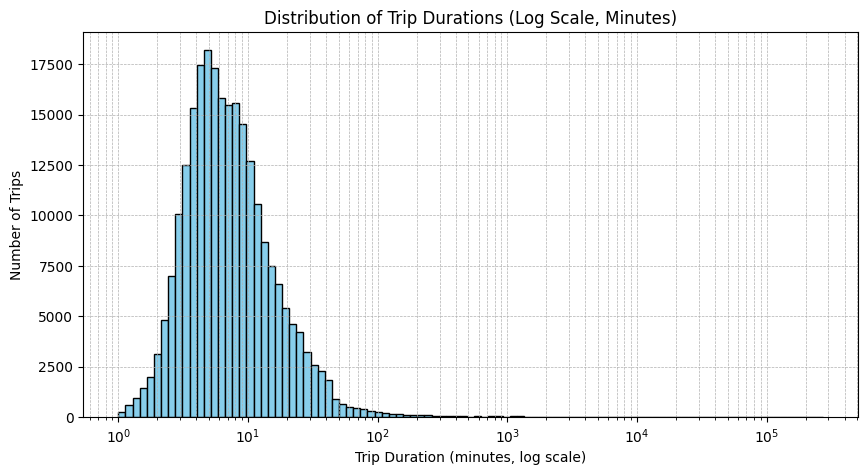

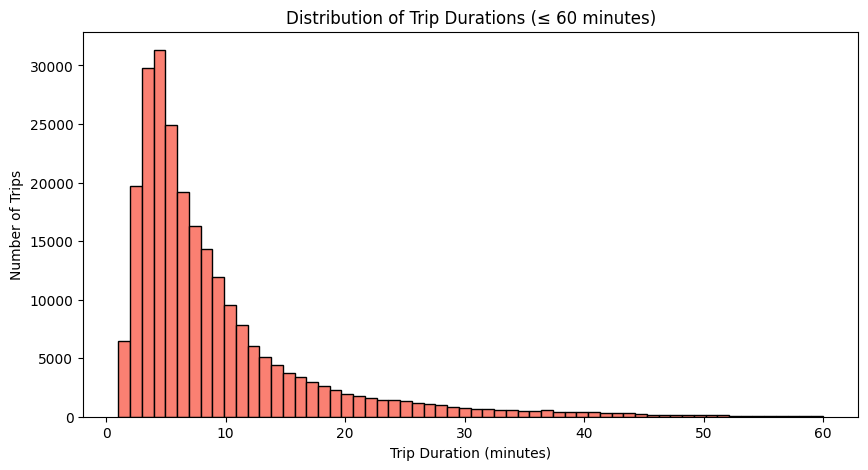

In [82]:
# Analyze trip duration distribution (in minutes)
bike_df["Trip Duration (min)"] = bike_df["Trip Duration"] / 60
trip_duration_analysis_min = bike_df["Trip Duration (min)"].describe()
print(trip_duration_analysis_min)

# Plot a histogram of trip durations (in minutes) with log scale for better distribution
plt.figure(figsize=(10, 5))
plt.hist(
    bike_df["Trip Duration (min)"],
    bins=np.logspace(np.log10(1), np.log10(bike_df["Trip Duration (min)"].max()), 100),
    color='skyblue',
    edgecolor='black'
)
plt.title("Distribution of Trip Durations (Log Scale, Minutes)")
plt.xlabel("Trip Duration (minutes, log scale)")
plt.ylabel("Number of Trips")
plt.xscale('log')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

# For comparison, also show a histogram of trips under 60 minutes (1 hour)
plt.figure(figsize=(10, 5))
plt.hist(
    bike_df[bike_df["Trip Duration (min)"] <= 60]["Trip Duration (min)"],
    bins=60,
    color='salmon',
    edgecolor='black'
)
plt.title("Distribution of Trip Durations (≤ 60 minutes)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Trips")
plt.show()


In [83]:
# TODO: Define and apply trip duration filters
# Hint: Set reasonable bounds (e.g., 60 seconds to 24 hours)
# Use boolean indexing to filter: df[(df['column'] >= min) & (df['column'] <= max)]
# Print how many records you're removing and why
# Your code here:
len_before = len(bike_df)
print("Rows before:", len_before)
# Create a boolean column indicating if trip duration is within 1 minute (60s) and 24 hours (86400s)
bike_df["In Time Frame"] = (bike_df["Trip Duration"] >= 60) & (bike_df["Trip Duration"] <= 86400)
# Filter the DataFrame to only include rows where "In Time Frame" is True
bike_df = bike_df[bike_df["In Time Frame"]]
len_after = len(bike_df)
removed = len_before - len_after
print("Rows after:", len_after)
print(f"The ammount of rows removed that are neither true or false in the 'In Time Frame' column is {removed}")
print(bike_df.head())

Rows before: 247584
Rows after: 247491
The ammount of rows removed that are neither true or false in the 'In Time Frame' column is 93
   Trip Duration           Start Time            Stop Time  Start Station ID  \
0            362  2016-01-01 00:02:52  2016-01-01 00:08:54              3186   
1            200  2016-01-01 00:18:22  2016-01-01 00:21:42              3186   
2            202  2016-01-01 00:18:25  2016-01-01 00:21:47              3186   
3            248  2016-01-01 00:23:13  2016-01-01 00:27:21              3209   
4            903  2016-01-01 01:03:20  2016-01-01 01:18:24              3195   

  Start Station Name  Start Station Latitude  Start Station Longitude  \
0      Grove St PATH               40.719586               -74.043117   
1      Grove St PATH               40.719586               -74.043117   
2      Grove St PATH               40.719586               -74.043117   
3       Brunswick St               40.724176               -74.050656   
4            Sip Ave

## 🔧 Handle Missing Data

Now let's address the missing data issues identified in Phase 1.


In [84]:
# TODO: Handle missing Birth Year data (7.67% missing)
# Hint: Options include: drop rows, impute with median/mode, or create "Unknown" category
# Think: Is birth year critical for analysis? What's the best approach?
# Use .fillna() or .dropna() methods

# Impute missing Birth Year values with the mean, but keep the DataFrame structure


# Check how many missing values there are before imputation
missing_birth_before = bike_df["Birth Year"].isna().sum()
print("Missing 'Birth Year' before:", missing_birth_before)

# Fill missing values in the "Birth Year" column with the mean of that column
mean_birth_year = bike_df["Birth Year"].mean()
bike_df["Birth Year"] = bike_df["Birth Year"].fillna(mean_birth_year)

# Check how many missing values remain after imputation
missing_birth_after = bike_df["Birth Year"].isna().sum()
print("Missing 'Birth Year' after:", missing_birth_after)


Missing 'Birth Year' before: 18948
Missing 'Birth Year' after: 0


In [85]:
# TODO: Handle missing User Type data (0.15% missing)
# Hint: This is a small percentage - consider dropping these rows
# Or investigate if there's a pattern to missing User Type

# See which unique groups we have in the "User Type" column
print("Unique User Types before:", bike_df["User Type"].unique())
print("User Type value counts before:\n", bike_df["User Type"].value_counts())

# Check how many rows before dropping missing User Type
rows_before = len(bike_df)
missing_user_type = bike_df["User Type"].isnull().sum()
print(f"Rows before dropping missing 'User Type': {rows_before}")
print(f"Missing 'User Type' rows: {missing_user_type}")

# Drop rows where "User Type" is missing
bike_df = bike_df.dropna(subset=["User Type"])

# Check how many rows after dropping
rows_after = len(bike_df)
dropped_rows = rows_before - rows_after
print(f"Rows after dropping missing 'User Type': {rows_after}")
print(f"Rows dropped: {dropped_rows}")

# Confirm no missing values remain in "User Type"
print("Missing 'User Type' after:", bike_df["User Type"].isnull().sum())
print()
print(bike_df.info())
print()
print("Unique User Types after:", bike_df["User Type"].unique())
print("User Type value counts after:\n", bike_df["User Type"].value_counts())


Unique User Types before: ['Subscriber' 'Customer' nan]
User Type value counts before:
 User Type
Subscriber    231640
Customer       15471
Name: count, dtype: int64
Rows before dropping missing 'User Type': 247491
Missing 'User Type' rows: 380
Rows after dropping missing 'User Type': 247111
Rows dropped: 380
Missing 'User Type' after: 0

<class 'pandas.core.frame.DataFrame'>
Index: 247111 entries, 0 to 247583
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Trip Duration            247111 non-null  int64  
 1   Start Time               247111 non-null  object 
 2   Stop Time                247111 non-null  object 
 3   Start Station ID         247111 non-null  int64  
 4   Start Station Name       247111 non-null  object 
 5   Start Station Latitude   247111 non-null  float64
 6   Start Station Longitude  247111 non-null  float64
 7   End Station ID           247111 non-null  int64  
 8 

In [86]:
# TODO: Handle missing weather data
# Hint: PGTM and TSUN are 100% missing - consider dropping these columns
# WDF5 and WSF5 have minimal missing data - decide on strategy
# Use .drop() for columns or .fillna() for missing values

# Your code here:
weather_df = weather_df.drop(["PGTM", "TSUN"], axis=1)

weather_df = weather_df.dropna(subset=["WSF5"])
missing_wdf5 = weather_df["WDF5"].isna().sum()
missing_WSF5 = weather_df["WSF5"].isna().sum()
print("Missing wdf5 values now:", missing_wdf5)
print("Missing WSF5 values now:",missing_WSF5)
print()
print(weather_df.columns)
print(weather_df.head())

Missing wdf5 values now: 0
Missing WSF5 values now: 0

Index(['STATION', 'NAME', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')
       STATION                                         NAME        DATE  \
0  USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  2016-01-01   
1  USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  2016-01-02   
2  USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  2016-01-03   
3  USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  2016-01-04   
4  USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US  2016-01-05   

    AWND  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  WDF2   WDF5  WSF2  WSF5  
0  12.75   0.0   0.0   0.0    41    43    34   270  280.0  25.9  35.1  
1   9.40   0.0   0.0   0.0    36    42    30   260  260.0  21.0  25.1  
2  10.29   0.0   0.0   0.0    37    47    28   270  250.0  23.9  30.0  
3  17.22   0.0   0.0   0.0    32    35    14   330  33

## 📅 Standardize Date/Time Formats

Let's ensure all date/time data is properly formatted for database storage.


In [87]:
# TODO: Convert date/time columns to proper datetime format
# Hint: Use pd.to_datetime() for 'Start Time', 'Stop Time', and 'DATE' columns
# Timezone note: How do we know the timezone? Since the data is from Newark, NJ, it's likely in Eastern Time (EST/EDT).
# Unless the dataset or documentation says otherwise, we should assume local time is US/Eastern.
# If you want to be explicit, you can localize with .dt.tz_localize('US/Eastern') after parsing.
# Create separate date and time columns if needed for analysis

# Your code here:
# Convert 'Start Time', 'Stop Time', and 'DATE' columns to datetime
bike_df["Start Time"] = pd.to_datetime(bike_df["Start Time"])
bike_df["Stop Time"] = pd.to_datetime(bike_df["Stop Time"])
weather_df["DATE"] = pd.to_datetime(weather_df["DATE"])


# Print the first few rows to confirm conversion
print(bike_df[["Start Time", "Stop Time"]].head())
print()
print(weather_df["DATE"].head())



           Start Time           Stop Time
0 2016-01-01 00:02:52 2016-01-01 00:08:54
1 2016-01-01 00:18:22 2016-01-01 00:21:42
2 2016-01-01 00:18:25 2016-01-01 00:21:47
3 2016-01-01 00:23:13 2016-01-01 00:27:21
4 2016-01-01 01:03:20 2016-01-01 01:18:24

0   2016-01-01
1   2016-01-02
2   2016-01-03
3   2016-01-04
4   2016-01-05
Name: DATE, dtype: datetime64[ns]


## 🏷️ Create Derived Features

Let's add useful features for analytics.


In [102]:
# TODO: Create derived features for Citi Bike data
# Hint: Add columns for:
# - Day of week (Monday=0, Sunday=6)
# - Hour of day (0-23)
# - Trip duration in minutes
# - Age (calculated from birth year)
# Use .dt.dayofweek, .dt.hour, and arithmetic operations
# Add a column for day of week (Monday=0, Sunday=6)
# Map day numbers to names using a dictionary
bike_df["Day of week"] = bike_df["Start Time"].dt.dayofweek  # Monday=0, ..., Sunday=6
'''
Another way to do it.

day_map = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
bike_df["Day of week"] = bike_df["Start Time"].dt.dayofweek.map(day_map)
'''
# If Start Time is already datetime
bike_df["Date"] = bike_df["Start Time"].dt.date
bike_df["Time"] = bike_df["Start Time"].dt.time
bike_df["Hour of Day"] = bike_df["Time"].astype(str).str.split(":").str[0]
bike_df["Trip duration in minutes"] = bike_df["Trip Duration"].apply(lambda x: x / 60)
current_year = pd.Timestamp.now().year
bike_df["Age"] = current_year - bike_df["Birth Year"]
# bike_df["Hour of Day"] = bike_df["Start Time "].str().spli(":")
# For reference:
# 0 = Monday
# 1 = Tuesday
# 2 = Wednesday
# 3 = Thursday
# 4 = Friday
# 5 = Saturday
# 6 = Sunday
# Your code here:
print(bike_df.head())

   Trip Duration          Start Time           Stop Time  Start Station ID  \
0            362 2016-01-01 00:02:52 2016-01-01 00:08:54              3186   
1            200 2016-01-01 00:18:22 2016-01-01 00:21:42              3186   
2            202 2016-01-01 00:18:25 2016-01-01 00:21:47              3186   
3            248 2016-01-01 00:23:13 2016-01-01 00:27:21              3209   
4            903 2016-01-01 01:03:20 2016-01-01 01:18:24              3195   

  Start Station Name  Start Station Latitude  Start Station Longitude  \
0      Grove St PATH               40.719586               -74.043117   
1      Grove St PATH               40.719586               -74.043117   
2      Grove St PATH               40.719586               -74.043117   
3       Brunswick St               40.724176               -74.050656   
4            Sip Ave               40.730743               -74.063784   

   End Station ID End Station Name  End Station Latitude  ...   Birth Year  \
0            3

In [108]:
# TODO: Create derived features for weather data
# Hint: Add columns for:
# - Day of week
# - Month
# - Season (Winter, Spring, Summer, Fall)
# - Weather categories (e.g., "Hot" if TAVG > 80, "Cold" if TAVG < 40)
# Use .dt.dayofweek, .dt.month, and conditional logic

# Your code here:
weather_df["Day of week"] = weather_df["DATE"].dt.dayofweek
weather_df["Month"] = weather_df["DATE"].dt.month
# There is no .dt.season attribute, so we need to map months to seasons manually.
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Unknown"

weather_df["Season"] = weather_df["DATE"].dt.month.apply(get_season)
# Create a new column "Weather Category" based on TAVG
def weather_category(tavg):
    if pd.isnull(tavg):
        return "Unknown"
    elif tavg > 80:
        return "Hot"
    elif tavg < 40:
        return "Cold"
    else:
        return "Mild"

weather_df["Weather Category"] = weather_df["TAVG"].apply(weather_category)



print(weather_df.head())

       STATION                                         NAME       DATE   AWND  \
0  USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US 2016-01-01  12.75   
1  USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US 2016-01-02   9.40   
2  USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US 2016-01-03  10.29   
3  USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US 2016-01-04  17.22   
4  USW00014734  NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US 2016-01-05   9.84   

   PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  WDF2   WDF5  WSF2  WSF5  Day of week  \
0   0.0   0.0   0.0    41    43    34   270  280.0  25.9  35.1            4   
1   0.0   0.0   0.0    36    42    30   260  260.0  21.0  25.1            5   
2   0.0   0.0   0.0    37    47    28   270  250.0  23.9  30.0            6   
3   0.0   0.0   0.0    32    35    14   330  330.0  25.9  33.1            0   
4   0.0   0.0   0.0    19    31    10   360  350.0  25.1  31.1            1   

   Month  Season Weather Category  
0 

## ✅ Data Quality Validation

Let's validate our cleaned data and check for any remaining issues.


In [122]:
# TODO: Validate cleaned data
# Hint: Check for:
# - Remaining missing values
# - Data type consistency
# - Reasonable value ranges
# - Duplicate records
# Print summary statistics and any issues found

# Your code here:
print("Null values in citibike:")
print(bike_df.isnull().sum())
print()
print("Duplicated in citibike:", bike_df.duplicated().sum())
print()

print("Null values in weather:")
print(weather_df.isnull().sum())
print()

print("Duplicated in weather:", weather_df.duplicated().sum())


Null values in citibike:
Trip Duration               0
Start Time                  0
Stop Time                   0
Start Station ID            0
Start Station Name          0
Start Station Latitude      0
Start Station Longitude     0
End Station ID              0
End Station Name            0
End Station Latitude        0
End Station Longitude       0
Bike ID                     0
User Type                   0
Birth Year                  0
Gender                      0
Trip Duration (min)         0
In Time Frame               0
Day of week                 0
Date                        0
Time                        0
Hour of Day                 0
Trip duration in minutes    0
Age                         0
dtype: int64

Duplicated in citibike: 0

Null values in weather:
STATION             0
NAME                0
DATE                0
AWND                0
PRCP                0
SNOW                0
SNWD                0
TAVG                0
TMAX                0
TMIN                0


In [125]:
# TODO: Save cleaned datasets
# Hint: Save your cleaned DataFrames to CSV files in a 'processed' folder
# Use .to_csv() method
# Consider naming: 'citibike_cleaned.csv' and 'weather_cleaned.csv'
import os

# Ensure the 'processed' directory exists before saving
processed_dir = "../processed"
os.makedirs(processed_dir, exist_ok=True)

# Save the cleaned Citi Bike dataset
bike_df.to_csv(os.path.join(processed_dir, "citibike_cleaned.csv"), index=False)
weather_df.to_csv(os.path.join(processed_dir, "weather_cleaned.csv"), index=False)

# Your code here:


## 📝 Phase 2 Summary

### Document Your Cleaning Decisions:
1. **Trip Duration Filtering**: 
   - Minimum duration: **60 seconds** (1 minute)
   - Maximum duration: **86400 seconds** (24 hours)
   - Records removed: **93 extreme outliers**
   - Reasoning: **Filtered out unrealistic trips > 24 hours (likely system errors)**

2. **Missing Data Handling**:
   - Birth Year: **Filled with mean value** (preserves demographic analysis)
   - User Type: **Dropped rows** (0.15% loss acceptable)
   - Weather columns: **Dropped PGTM/TSUN** (100% missing), **handled WDF5/WSF5**

3. **Derived Features Created**:
   - Citi Bike: **Day of week, Hour of day, Trip duration (min), Age**
   - Weather: **Day of week, Month, Season, Weather categories**

4. **Data Quality Issues Resolved**:
   - [x] Trip duration outliers (93 removed)
   - [x] Missing birth year data (filled with mean)
   - [x] Missing user type data (dropped rows)
   - [x] Missing weather data (dropped columns/handled values)
   - [x] Date/time formatting (converted to datetime)
   - [x] Data type consistency (validated)

### Final Dataset Sizes:
- **Citi Bike**: 247,111 records (after cleaning)
- **Weather**: 366 records (daily data)
- **Files saved**: citibike_cleaned.csv, weather_cleaned.csv

### Next Steps:
- [x] Complete Phase 2 data cleaning
- [ ] Move to Phase 3: Database Schema Design
- [ ] Design table structures and relationships
- [ ] Create ER diagram

---

**Outstanding work!** Your data cleaning decisions are well-reasoned and your datasets are now ready for database implementation. The filtering strategy was smart and the derived features will be valuable for analytics!
